<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/XGBoost/XGBoost_on_Churn_Modelling_Bank_Dataset%20with%20SMOTE%20and%20ADASYN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('https://bit.ly/2QMuIPs')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
X = df.iloc[:, 3:-1]
X.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [5]:
X.shape

(10000, 10)

In [6]:
y = df.Exited
y[:2]

0    1
1    0
Name: Exited, dtype: int64

#Check for class imbalance

In [7]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#check for null values

In [8]:
df.isnull().sum().sort_values(ascending = False)[:2]

Exited             0
EstimatedSalary    0
dtype: int64

## get dummy variable

In [9]:
X = pd.get_dummies(X, drop_first = True).values
X.shape

(10000, 11)

In [10]:
y = df.Exited
y.shape

(10000,)

### Train test split

In [0]:
from sklearn.model_selection import train_test_split as tts

In [12]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = .2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

#Over Sampling using SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [14]:
X_train.shape, y_train.shape

((8000, 11), (8000,))

In [15]:
X_train_smote, y_train_smote = SMOTE().fit_sample(X_train, y_train)
X_train_smote.shape, y_train.shape

((12736, 11), (8000,))

In [16]:
pd.Series(y_train_smote).value_counts()

1    6368
0    6368
dtype: int64

In [0]:
from imblearn.over_sampling import ADASYN

In [18]:
X_train_adasyn, y_train_adasyn = ADASYN().fit_sample(X_train, y_train)
X_train_adasyn.shape, y_train_adasyn.shape

((12835, 11), (12835,))

In [19]:
pd.Series(y_train_adasyn).value_counts()

1    6467
0    6368
dtype: int64

# Train model

In [20]:
!git clone https://github.com/noushadkhan01/my_methods

Cloning into 'my_methods'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 263 (delta 63), reused 0 (delta 0), pack-reused 153
Receiving objects: 100% (263/263), 68.80 KiB | 1.13 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [21]:
%cd my_methods

/content/my_methods


In [22]:
!ls

choose_best_classifier.py	      my_global_variables.py
choose_optimal_number_of_clusters.py  my_roc_curve.py
get_cross_validation.py		      print_model_results.py
my_cap_curve.py			      README.md
my_dummy_variable_2.py		      visualise_classifier_performance.py
my_dummy_variable_creator.py


In [0]:
from print_model_results import print_model_results
from get_cross_validation import get_cross_validation
import my_global_variables
my_global_variables.init()

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
classifier = XGBClassifier(max_depth = 4, random_state = 0)
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
model = print_model_results(X_train, X_test, y_train, y_test, classifier, extra_name = 'simple')

 Train score is 0.879625


Test score is 0.866



Train confusion matrix is 
 [[6208  160]
 [ 803  829]]

Test confusion matrix is 
 [[1526   69]
 [ 199  206]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



## Cross_validation

In [0]:
from get_cross_validation import get_cross_validation

In [28]:
model = XGBClassifier(max_depth = 4)
get_cross_validation(X_train, y_train, model, extra_name = 'simple')

10 fold cross-validation for -- XGBClassifier_simple-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.86891386 0.86267166 0.88       0.865      0.85875    0.86375
 0.87       0.85625    0.84355444 0.87484355]


variance in scores for 10 fold cross-validationn for XGBClassifier:-- 0.00969952339670716




'Mean for 10 fold cross-validation score:-- 0.8643733515599242'

##train model with smote features

In [29]:
classifier = XGBClassifier(max_depth = 4, random_state = 0)
model = print_model_results(X_train_smote, X_test, y_train_smote, y_test, classifier, extra_name = 'smote')
model = XGBClassifier(max_depth = 4)
get_cross_validation(X_train_smote, y_train_smote, model, extra_name = 'smote')

 Train score is 0.9159076633165829


Test score is 0.862



Train confusion matrix is 
 [[6082  286]
 [ 785 5583]]

Test confusion matrix is 
 [[1495  100]
 [ 176  229]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.70      0.57      0.62       405

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.85      0.86      0.86      2000

10 fold cross-validation for -- XGBClassifier_smote-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.72135008 0.71036107 0.84301413 0.96310832 0.96389325 0.96860283
 0.9678179  0.95761381 0.95597484 0.96619497]


variance in scores for 10 fold cross-validationn for XGBClassifier:-- 0.09964882671990548




'Mean for 10 fold cross-validation score:-- 0.9017931192796423'

##train model with adasyn features

In [30]:
classifier = XGBClassifier(max_depth = 4, random_state = 0)
model = print_model_results(X_train_adasyn, X_test, y_train_adasyn, y_test, classifier, extra_name = 'adasyn')
model = XGBClassifier(max_depth = 4)
get_cross_validation(X_train_adasyn, y_train_adasyn, model, extra_name = 'adasyn')

 Train score is 0.9166342033502143


Test score is 0.86



Train confusion matrix is 
 [[6075  293]
 [ 777 5690]]

Test confusion matrix is 
 [[1490  105]
 [ 175  230]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.69      0.57      0.62       405

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.85      0.86      0.85      2000

10 fold cross-validation for -- XGBClassifier_adasyn-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.72352025 0.71183801 0.855919   0.96495327 0.9665109  0.96962617
 0.95872274 0.95791115 0.95943838 0.96567863]


variance in scores for 10 fold cross-validationn for XGBClassifier:-- 0.09824248592553005




'Mean for 10 fold cross-validation score:-- 0.9034118493111458'

 Done 6/6

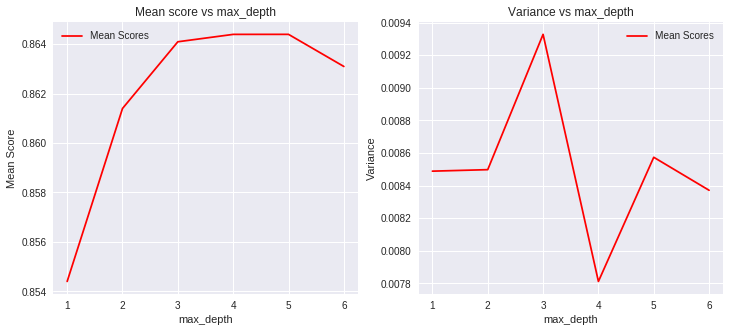

In [0]:
x = range(1, 7)
means = []
variances = []
import sys
for i in x:
  sys.stdout.write(f'\r Running {i}/{len(x)}')
  model = XGBClassifier(max_depth = i)
  mean, variance = get_cross_validation(X, y, model, cv = 10, out = False, variance = True)
  means.append(mean)
  variances.append(variance)
  sys.stdout.flush()
  if i == x[-1]:
    sys.stdout.write(f'\r Done {i}/{len(x)}')

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.title('Mean score vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Score')
plt.plot(x, means, c = 'r', label = 'Mean Scores')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Variance vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Variance')
plt.plot(x, variances, c = 'r', label = 'Mean Scores')
plt.legend()
plt.show()

In [32]:
my_global_variables.model_cm

{'XGBClassifier_adasyn': {'test': array([[1490,  105],
         [ 175,  230]]), 'train': array([[6075,  293],
         [ 777, 5690]])}, 'XGBClassifier_simple': {'test': array([[1526,   69],
         [ 199,  206]]), 'train': array([[6208,  160],
         [ 803,  829]])}, 'XGBClassifier_smote': {'test': array([[1495,  100],
         [ 176,  229]]), 'train': array([[6082,  286],
         [ 785, 5583]])}}

In [34]:
my_global_variables.model_cross_validation

{'XGBClassifier_adasyn': {'mean': 0.9034118493111458,
  'variance': 0.09824248592553005},
 'XGBClassifier_simple': {'mean': 0.8643733515599242,
  'variance': 0.00969952339670716},
 'XGBClassifier_smote': {'mean': 0.9017931192796423,
  'variance': 0.09964882671990548}}

In [35]:
my_global_variables.model_score

{'XGBClassifier_adasyn': {'test': 0.86, 'train': 0.9166342033502143},
 'XGBClassifier_simple': {'test': 0.866, 'train': 0.879625},
 'XGBClassifier_smote': {'test': 0.862, 'train': 0.9159076633165829}}

In [0]:
import seaborn as sns

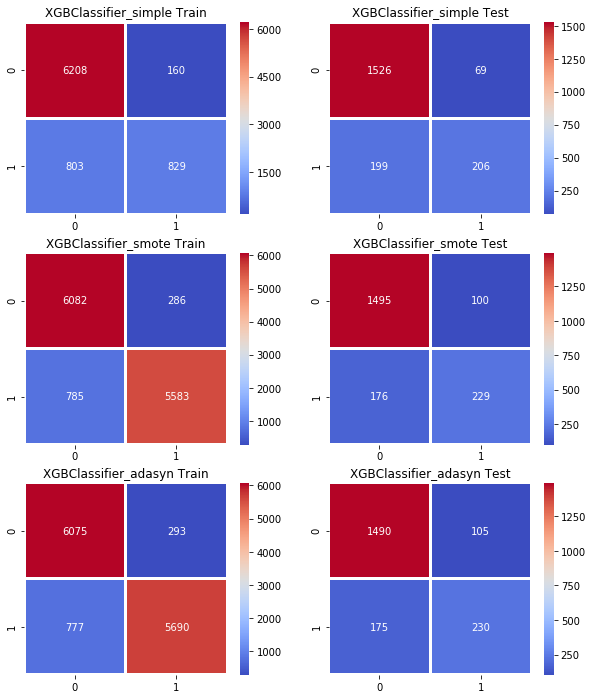

In [45]:
plt.figure(figsize = (10, 12))
n = 1
for i, j in my_global_variables.model_cm.items():
  plt.subplot(3, 2, n)
  plt.title(f'{i} Train')
  sns.heatmap(j.get('train'), annot = True, cmap = 'coolwarm', lw = 2, fmt = 'd')
  n += 1
  plt.subplot(3, 2, n)
  plt.title(f'{i} Test')
  sns.heatmap(j.get('test'), annot = True, cmap = 'coolwarm', lw = 2, fmt = 'd')
  n += 1
  
plt.show()